# Erarbeitung der Funktion np.linspace() 

am Beispiel der Erstellung einer Wertetabelle für eine lineare Funktion

Um das im Beispiel dargestellte Diagramm zu erzeugen, wird `pandas` zusammen mit `numpy` und der Plotbibliothek `matplotlib` verwendet. Diese Module werden im ersten Schritt importiert:

In [1]:
import pandas as pd # üblicher import von pandas
import numpy as np # üblicher import von numpy

import matplotlib.pyplot as plt # üblicher import von matplotlib
import matplotlib.ticker as tk # ermöglicht die Änderung der Achsenskalierung
%matplotlib inline 
%config InlineBackend.figure_format='retina'  # nur MacBook Pro

Die Wertetabelle wird so erstellt, das zunächst Werte für die $x$-Achse erzeugt werden; das ist der Verbrauch in $\mathrm{kWh}$. Aus diesen Werten werden dann im nächsten Schritt die benötigten $y$-Werte berechnet. Das sind in diesem Fall zwei Spalten, nämlich die Kosten, die Herrn Meyer entstehen und die Kosten, die Herrn Schmidt entstehen. 

Da der Verbrauch von Herrn Meyer bei $20\;000\,\mathrm{kWh}$ liegt, muss die $x$-Achse bis $20\;000$ reichen. Als Startwert wird sinnvollerweise der Wert $0$ gewählt, weil die Grundgebühr auch ohne jeglichen Verbrauch gezahlt werden muss.

Das Intervall auf der $x$-Achse besteht deshalb aus allen Zahlen, die innerhalb dieser Grenzen liegen (einschließlich der Randwerte), in Zeichen: 

$$0 \le x \le 20\,000 \quad\text{ oder, alternative Darstellung: }\quad [0,20\,000].$$

Das Zeichen $\le$ wird *"kleiner gleich"* gelesen und bedeutet, dass der Anfangswert und der Endwert zum Intervall gehören. 

Um einen Graphen plotten zu können, müssen in diesem Intervall Punkte für die Wertetabelle festgelegt werden. Dabei hängt die Anzahl der Punkte von den Genauigkeitsansprüchen an die Grafik ab. Der Übersichtlichkeit wegen sollen fünf Punkte gleichmäßig verteilt werden. Das sind die Punkte

|$x_0$ | $x_1$ | $x_2$ | $x_3$ | $x_4$|
-------|-------|-------|-------|------|
|0     | 5000  | 10000 | 15000 | 20000|

Beachten Sie, dass die Nummerierung der Listenwerte mit dem Index 0 beginnt und der letzte Index deshalb um eins kleiner ist, als die Anzahl der Punkte, die das Intervall überdecken.

Die Überdeckung 

$$[x_0, x_1, x_2, x_3, x_4]$$

besteht aus fünf Punkten und führt zu vier Teilintervallen gleicher Größe. Das sind die Teilintervalle

$$
  [0,5\,000],\quad [5\,000,10\,000],\quad [10\,000,15\,000],\quad [15\,000,20\,000]
$$

Die Länge eines Teilintervalls ergibt sich deshalb als

$$
  \Delta x = \dfrac{\text{Länge des Intervalls}}{\text{Anzahl der Teilintervalle}}
           = \dfrac{20\,000}{4}
           = 5\,000
$$

Eine solche gleichmäßige Überdeckung lässt sich mit der Funktion `np.linspace()` erzeugen. Der Aufruf lautet

`lx = np.linspace(start,stop,num=50)`

In diesem Aufruf steht
- **lx** für die zurückgegebenen Zahlenwerte. Dieser Name ist willkürlich gewählt.<br>
  Der Buchstabe `l` kommt von `linspace`, der Buchstabe `x` gibt die Koordinatenachse an.
- **start** und **stop** geben die Intervallgrenzen an.<br>
  Meist wird `start < stop` sein. Es darf aber `start > stop` sein, 
  dann wird das Intervall in umgekehrter Richtung durchlaufen.
- **num** gibt die Anzahl der zurückgegebenen Werte an. <br>
  Wird kein Wert für `num` angegeben, so wird ein Standardwert von 50 Punkten genommen.
  
Auf einzelne Werte des zurückgegebenen `array`-Objekts wird mit `lx[index]` zugegriffen, zum Beispiel gibt `lx[1]` den Wert mit dem Index 1 zurück, dass ist der zweite Eintrag (vgl. die Ausgabe der nächsten Zellen).


In [2]:
# Erzeugung von lx
lx = np.linspace(0, 20000, 5)

# Kontrollausdruck
lx

array([    0.,  5000., 10000., 15000., 20000.])

Der Zugriff auf den Wert mit Index 1 erfolgt mit eckigen Klammern:

In [3]:
lx[1]

5000.0

Nachdem das Intervall `lx` erzeugt worden ist, kann der DataFrame gebildet werden. 

Um das Vorgehen deutlich zu machen, wird im nächsten Schritt nur die Spalte für die $x$-Achse angelegt:

In [4]:
# Erzeugung eines DataFrame mit einer Spalte für die x-Achse
df = pd.DataFrame(
    {
        'x': lx
    }
)

# Kontrollausdruck
df

,x
0,0.0
1,5000.0
2,10000.0
3,15000.0
4,20000.0


Da mit `numpy`-Objekten gerechnet werden kann, kann der DataFrame sofort komplett angelegt werden. Häufig werden die beiden Schritte 
- erstellen des `np.linspace()`-Objekts und 
- Aufstellen des `pd.DataFrame()`

in einer Zelle durchgeführt. Am Ende der Zelle gibt man dann zur Kontrolle den DataFrame (oder einen Teil davon) aus.

Die komplette Zelle ist dann:

In [5]:
# Erzeugung von lx
lx = np.linspace(0, 20000, 5)

# Erzeugung des gesamten DataFrame df
df = pd.DataFrame(
    {
        'x': lx,
        'Meyer': 384 + 0.055*lx,
        'Schmidt': 144 + 0.068*lx
    }
)

# Kontrollausdruck
df

,x,Meyer,Schmidt
0,0.0,384.0,144.0
1,5000.0,659.0,484.0
2,10000.0,934.0,824.0
3,15000.0,1209.0,1164.0
4,20000.0,1484.0,1504.0


Nachdem der DataFrame fertig erstellt ist, können die Daten geplottet werden. 

Dabei muss dem Plotbefehl mitgeteilt werden, welche Größe als $x$-Achse zu nutzen ist.

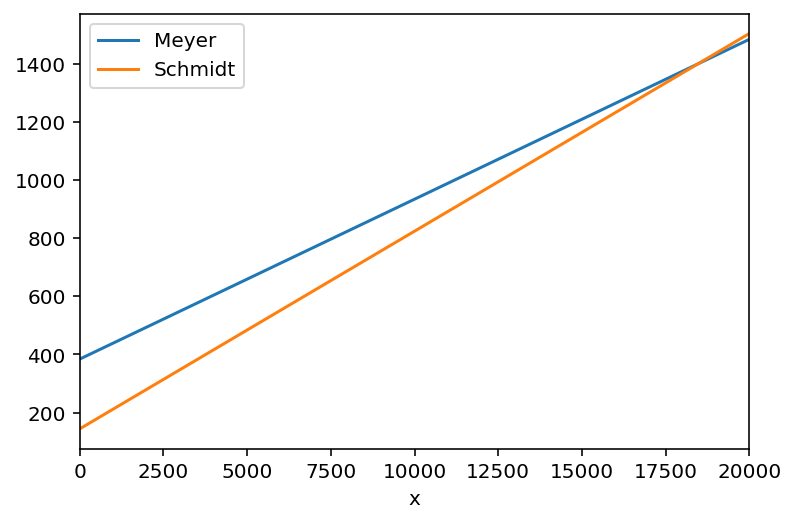

In [6]:
df.plot(x='x')

Es gibt eine Fülle von Einstellmöglichkeiten, um die Ausgabe optisch aufzubereiten. Die sollen allerdings nicht an dieser Stelle thematisiert werden. 

**In den folgenden Aufgaben geht es darum, die Funktion `np.linspace()` genauer kennenzulernen.**

### Aufgabe 1
Ergänzen Sie in der folgenden Zelle den Aufruf von `np.linspace()` so, dass die Funktion

$$
  y = 3\,x + 5
$$

für $-3 \le x \le 3$ mit 5 Punkten dargestellt wird.

#### Lösung

In [7]:
# Achten Sie darauf, dass Kommentarzeichen vor der nächsten Zeile zu entfernen!
lx = np.linspace(-3,3,5)

df = pd.DataFrame(
    {
        'x': lx,
        'y': 3*lx + 5
    }
)

df

,x,y
0,-3.0,-4.0
1,-1.5,0.5
2,0.0,5.0
3,1.5,9.5
4,3.0,14.0


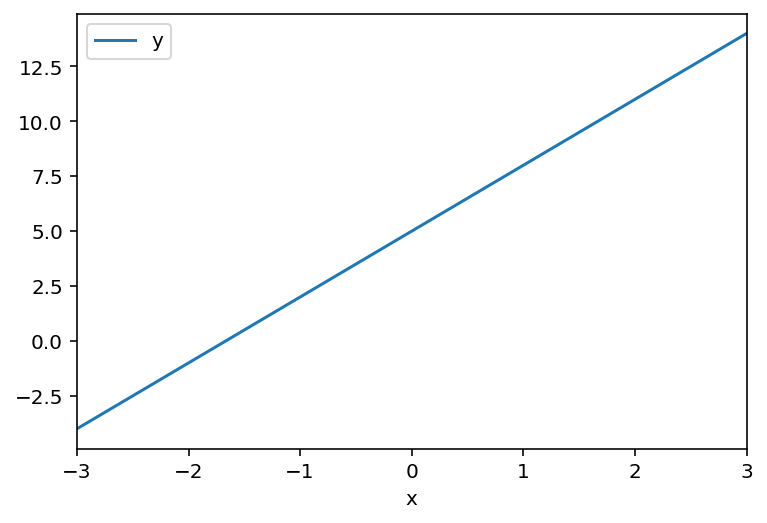

In [8]:
df.plot(x='x')

### Aufgabe 2
Geben Sie von Hand an, welche Zahlenwerte von dem Befehl 

`np.linspace(-3,7,5)`

erzeugt werden. Überprüfen Sie dann Ihr Ergebnis mit Hilfe Ihres Notebooks.

#### Lösung
Das Intervall $[-3,7]$ hat die Länge $\ell = 7-(-3)=10$. 

Es wird in vier Teilintervalle zerlegt, jedes Teilintervall hat deshalb die Länge 
$\ell_\mathrm{t}= \frac{10}{4} = 2.5$. 

Damit werden die folgenden Zahlenwerte ausgegeben: <br>
`[-3, -3+1*2.5=-0.5, -3+2*2.5=2, -3+3*2.5=4.5, -3+4*2.5=7]`

oder, kurz: `[-3,-0.5,2,4.5,7]`

In [9]:
np.linspace(-3,7,5)

array([-3. , -0.5,  2. ,  4.5,  7. ])

### Aufgabe 3

Im Intervall $[-0.5,7.5]$ soll die Funktion

$$
  f(x) = -5\,x + 2.5
$$

dargestellt werden. Erzeugen Sie eine Wertetabelle mit 10 Punkten und plotten Sie die Funktion

#### Lösung

In [10]:
lx = np.linspace(-0.5,7.5,10)

df = pd.DataFrame(
    {
        'x': lx,
        'y': -5*lx + 2.5
    }
)

df

,x,y
0,-0.500000,5.000000
1,0.388889,0.555556
2,1.277778,-3.888889
3,2.166667,-8.333333
4,3.055556,-12.777778
5,3.944444,-17.222222
6,4.833333,-21.666667
7,5.722222,-26.111111
8,6.611111,-30.555556
9,7.500000,-35.000000


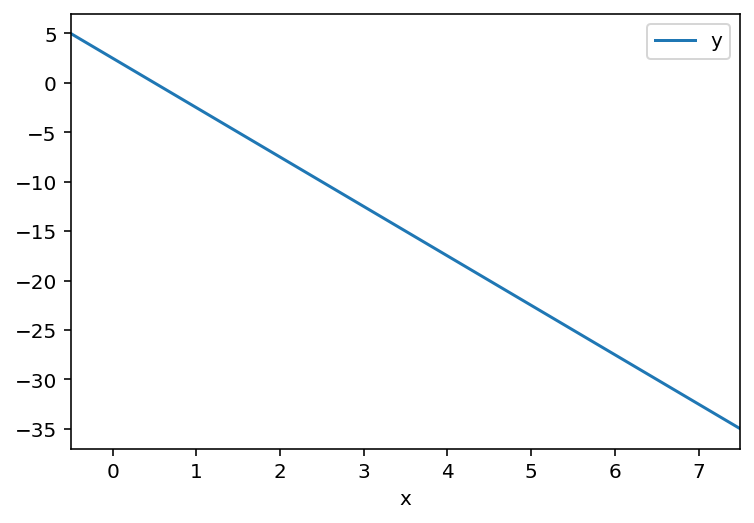

In [11]:
df.plot(x='x')

# Vollständige Liste der Parameter von np.linspace()

Die Funktion `np.linspace()` hat mehr Parameter, als bis jetzt besprochen wurden. Sie kann
auf zwei verschiedene Arten aufgerufen werden.

Die vollständige Parameterliste dieser Funktion lautet entweder

`lx = np.linspace(start, stop, num=50, endpoint=True, ret_step=False, dtype=None)`

oder

`lx, step = np.linspace(start, stop, num=50, endpoint=True, retstep=True, dtype=None)`

Der Unterschied im Vergleich zum ersten Aufruf besteht darin, dass `ret_step=True` ist. Dadurch wird das `array` der Zahlen in der Variablen `lx` zurückgegeben und zusätzlich die Schrittweite in der Variablen `step`.

Die Bedeutung der Aufrufparameter ist im Einzelnen:

- **start**: erster zurückgegebener Wert
- **stop**: letzter zurückgegebener Wert
- **num**: Anzahl der zurückgegebenen Werte. Wenn hier nichts angegeben wird, werden 50 Werte zurückgegeben
- **endpoint=True**: Der Endpunkt des Intervalls (`stop`) wird zurückgegeben 
  (Standardfall, muss nicht angegeben werden)
- **endpoint=False**: Der Endpunkt des Intervalls (`stop`) wird nicht zurückgegeben
  (muss angegeben werden)
- **retstep=False**: Die Schrittweite wird nicht zurückgegeben (Standardfall, muss nicht angegeben werden)
- **retstep=True**: Die Schrittweite wird zurückgegeben (muss angegeben werden)
- **dtype=None**: Der Datentyp der zurückgegebenen Werte wird automatisch bestimmt 
  (Standardfall, muss nicht angegeben werden)
- **dtype=Type**: Der Datentyp der zurückgegebenen Werte entspricht Type (muss angegeben werden)

In den meisten Fällen werden die ersten drei oder vier Parameter benötigt. In seltenen Fällen kann es nötig werden, den Endpunkt des Intervalls nicht zu den Daten zu zählen. Dann setzt man `endpoint=False`. Manchmal ist es auch sinnvoll, den Datentyp angeben zu können.

### Aufgabe 4

Das halboffene Intervall $-5 \le x \lt 5$ besteht aus allen Zahlen, die zwischen $-5$  und $+5$ liegen, wobei der Endwert des Intervalls wegen $x \lt 5$ aber ausgeschlossen ist. Geben Sie eine Überdeckung dieses Intervalls mit 10 Punkten an. Achten Sie insbesondere darauf, dass der Endpunkt des Intervalls nicht zu den zurückgegebenen Werten gehören darf. Plotten Sie die Funktion 

$$
  y = 1.3\,x + 0.5
$$

und beantworten Sie weiterhin die Fragen

- Durch wie viele Teilintervalle wird das Intervall überdeckt?
- Welche Schrittweite ergibt sich
- Was fällt Ihnen bei dem geplotteten Diagramm auf?

#### Lösung

In [12]:
lx = np.linspace(-5,5,num=10,endpoint=False)
lx

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

Das Intervall $-5\le x \lt 5$ wird durch 10 Teilintervalle überdeckt. Die Schrittweite jedes Teilintervalls beträgt $ \ell_\mathrm{t}=\frac{10}{10}=1.0$. Es ist

In [13]:
-5 + 10*1

5

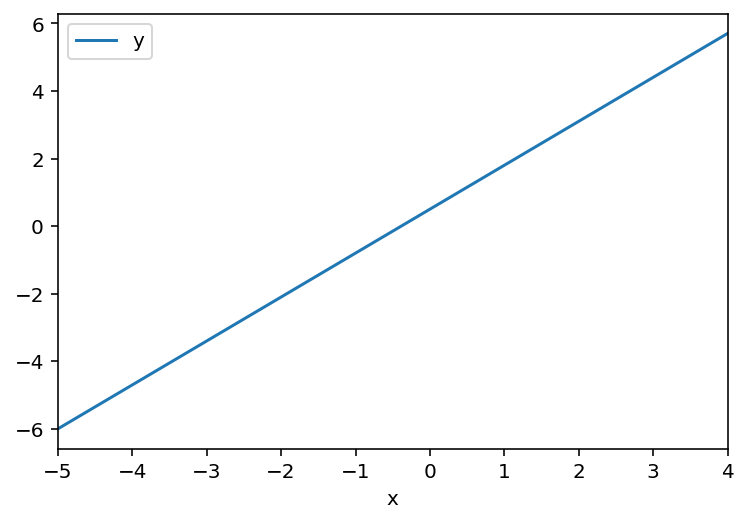

In [14]:
df = pd.DataFrame(
    {
        'x': lx,
        'y': 1.3*lx + 0.5
    }
)

ax = df.plot(x='x')

Die Zahl 5 wird jedoch von `np.linspace(-5,5,endpoint=False)` nicht zurückgegeben! 

Damit wird das letzte Teilintervall  von $4 \le x \lt 5$ durch das `array` nicht dargestellt, wenn `endpoint=False` ist. Der Graph endet deshalb nicht bei $x=5$, sondern bereits bei $x=4$.

### Aufgabe 5
In wie viele Teilintervalle wird das Intervall $0\le x \le 10$ durch den Aufruf

`lx = np.linspace(0,10,10)`

zerlegt? Geben Sie auch die Schrittlänge (Länge eines Teilintervalls) an.

#### Lösung

Das Intervall $0\le x \le 10$ wird durch den Aufruf `lx = np.linspace(0,10,10)` in 9 Teilintervalle zerlegt, deren Länge jeweils $\frac{10}{9}\approx 1.11$ ist.

In [15]:
lx,step = np.linspace(0,10,10,retstep=True)
display(lx)
display(step)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

1.1111111111111112

### Aufgabe 6
Das Intervall $0\le x \le 6$ soll in genau sechs Teilintervalle zerlegt werden.

Schreiben Sie die notwendigen Punkte von Hand auf und geben Sie den erforderlichen `np.linspace()`-Funktionsaufruf an. 

Überprüfen Sie Ihr Ergebnis mit Hilfe des Notebooks

#### Lösung

Sollen genau sechs Teilintervalle entstehen und der Endpunkt zum zu den zurückgegebenen Werten gehören, so ist `num=7` zu setzen. Es ist

In [16]:
lx = np.linspace(0,6,7)
lx

array([0., 1., 2., 3., 4., 5., 6.])

### Aufgabe 7
Welche Schrittweite liefert der Funktionsaufruf `lx = np.linspace(1,10)`? 

Geben Sie das Ergebnis zunächst von Hand an und überprüfen Sie es mit Hilfe des Notebooks.

#### Lösung

Das Intervall $1\le x \le 10$ hat die Länge 9. Wegen `num=50` und `endpoint=True` wird es in 49 Teilintervalle zerlegt. 

Jedes Teilintervall hat die Länge $\frac{9}{49}\approx 0.1837$

In [17]:
lx,step = np.linspace(1,10,retstep=True)
(lx,step)

(array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
         1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
         2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
         3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
         4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
         5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
         6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
         7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
         8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
         9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ]),
 0.1836734693877551)